# State Value Function

We want to calculate $V_{\pi}(s)$ (the state-value-function given a policy)
![mdp.png](mdp.png)

# 6.1 Policy Evaluation by Dynamic Programming

In [1]:
#%load_ext autoreload
#%autoreload 2

In [2]:
import numpy as np

policy=np.array([[0.3, 0.2, 0.5], [0.5, 0.4, 0.1], [0.8, 0.1, 0.1]])
# 'raw_rewards' variable contains rewards obtained after transition to each state
# In our example it doesn't depend on source state
raw_rewards = np.array([1.5, -1.833333333, 19.833333333])
# 'rewards' variable contains expected values of the next reward for each state
rewards = np.matmul(policy, raw_rewards)
assert np.allclose(rewards, np.array([10., 2., 3.]))

state_value_function=np.array([0 for i in range(3)])

gamma = 0.1
for i in range(20):
    print(state_value_function)
    state_value_function = rewards + gamma * np.matmul(policy, state_value_function)
    
print(state_value_function)

[0 0 0]
[10.  2.  3.]
[10.49  2.61  3.85]
[10.5594  2.6674  3.9038]
[10.56532   2.673704  3.910464]
[10.56595688  2.6743188   3.91106728]
[10.56601845  2.67438127  3.91113041]
[10.5660247   2.67438748  3.91113659]
[10.56602532  2.6743881   3.91113722]
[10.56602538  2.67438816  3.91113728]
[10.56602539  2.67438817  3.91113728]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]


# 6.1 Policy Evaluation by Linear Programming

The state-value-function can be directly solved through linear programming (as shown on page 15):


In [3]:
solution =np.linalg.inv(np.eye(policy.shape[0]) - gamma*policy)
solution = np.matmul(solution, rewards)
#TODO: Implement the linear programming solution with a discount rate of 0.1
print(solution)

[10.56602539  2.67438817  3.91113729]


The result stays the same.

# 6.2 Monte Carlo Policy Evaluation


Monte Carlo Policy Evaluation can also be used, whereby sampling is used to get to the same result

In [8]:
import random
from collections import defaultdict
reward_counter=np.array([0., 0., 0.])
visit_counter=np.array([0., 0., 0.])

def gt(rewardlist, gamma=0.1):
    '''
    Function to calculate the total discounted reward
    >>> gt([10, 2, 3], gamma=0.1)
    10.23
    '''
    rewards = np.array(rewardlist)
    powers = np.arange(rewards.shape[0])
    powers = np.power(gamma*np.ones(rewards.shape[0]), powers)
    #print(rewards)
    #print(powers)
    return np.sum(np.multiply(rewards, powers))


for i in range(400):
    start_state=random.randint(0, 2)
    next_state=start_state
    rewardlist=[]
    occurence=defaultdict(list) 
    for i in range(250):
        rewardlist.append(rewards[next_state]) 
        occurence[next_state].append(len(rewardlist)-1) 
        action=np.random.choice(np.arange(0, 3), p=policy[next_state]) 
        next_state=action

    for state in occurence: 
        for value in occurence[state]: 
            rew=gt(rewardlist[value:]) 
            reward_counter[state]+=rew 
            visit_counter[state]+=1 
            #break #if break: return following only the first visit
print(reward_counter/visit_counter)

[10.56473158  2.66801647  3.90664402]


As can be seen the result is nearly the same as the state-value-function calculated above.

# 6.2 Policy Optimization by Q-Learning

This code solves a very easy problem: using the rewards it calculated the optimal action-value-function.

It samples a state-action pair randomly, so that all state-action pairs can be seen.

In [10]:
q_table=np.zeros((3, 3)) 
alfa = 0.99
gamma = 0.1
for i in range(1001): 
    state=random.randint(0, 2) 
    action=random.randint(0, 2) 
    next_state=action
    reward=raw_rewards[next_state] 
    next_q=max(q_table[next_state]) 
    q_table[state, action]= (1.0 - alfa) * q_table[state, action] +  alfa * (reward + gamma * next_q)
    #if i%100==0:
        #print(q_table)
print(q_table)

[[ 3.7037037   0.37037037 22.03703704]
 [ 3.7037037   0.37037037 22.03703704]
 [ 3.7037037   0.37037037 22.03703704]]


In [11]:
value_s = np.zeros(3)
for state in range(3):
    for action in range(3):
        value_s[state] = value_s[state] + q_table[state, action] * policy[state, action]
value_s

array([12.2037037,  4.2037037,  5.2037037])

# 6.3 Score Function Gradient Estimator
Implement the score function gradient estimator in lxmls/reinforcement_learning/score\_function\_estimator.py. Check it is correct by calling the train() function.

/home/candeiasalexandre/code/lxmls-toolkit/lxmls/reinforcement_learning/score_function_estimator.py:40: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  poli = torch.nn.functional.softmax(model.t_policy).data.numpy()
/home/candeiasalexandre/code/lxmls-toolkit/lxmls/reinforcement_learning/score_function_estimator.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  policy = torch.nn.functional.log_softmax(self.t_policy)


[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]]
[0.3, 0.2, 1.0, 0.2, 1.0, 1.0, 1.0, 0.2, 1.0, 0.3, 0.3, 0.3, 0.2, 0.3, 1.0, 1.0, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.2, 1.0, 0.3, 1.0, 0.2, 0.3, 1.0, 0.2, 0.2, 0.2, 0.3, 1.0, 0.2, 0.3, 0.2, 0.2, 0.3]


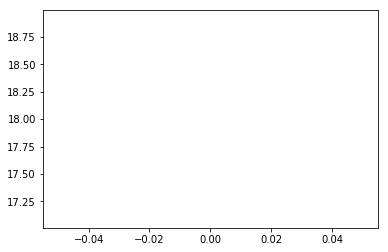

[[4.0628654e-03 9.9560201e-01 3.3513061e-04]
 [9.9286991e-01 4.6877312e-03 2.4423255e-03]
 [9.5059830e-01 3.0096743e-02 1.9305008e-02]]
[0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0]


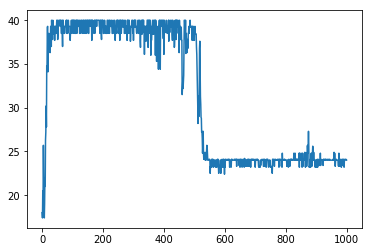

[[9.9838199e-04 9.9891257e-01 8.9040375e-05]
 [4.1761314e-03 9.9526167e-01 5.6218822e-04]
 [9.7226590e-01 1.0933528e-02 1.6800666e-02]]
[0.3, 1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


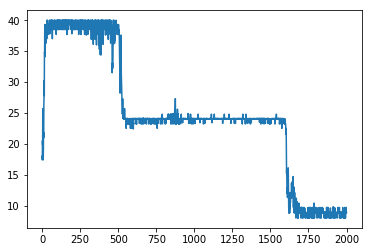

[[8.5521460e-04 9.9908900e-01 5.5693701e-05]
 [9.9954730e-01 4.0947014e-04 4.3267537e-05]
 [9.1609704e-01 4.1781947e-02 4.2121075e-02]]
[0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0]


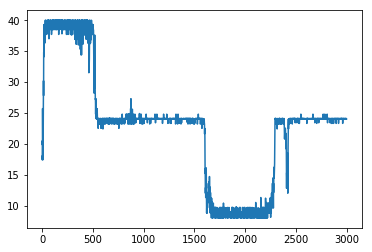

[[2.3674916e-03 9.9756765e-01 6.4956366e-05]
 [9.9980897e-01 1.6183031e-04 2.9195269e-05]
 [9.2606592e-01 4.0258273e-02 3.3675749e-02]]
[1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2]


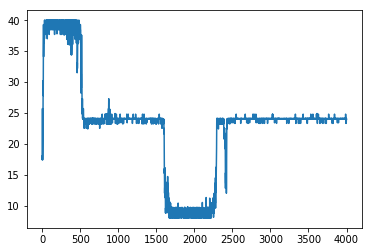

[[3.1121441e-03 9.9681735e-01 7.0444818e-05]
 [9.9969518e-01 2.7533399e-04 2.9586037e-05]
 [9.4060743e-01 3.9110489e-02 2.0281982e-02]]
[1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2]


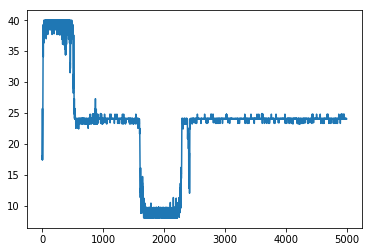

[[3.0225897e-03 9.9692744e-01 5.0026545e-05]
 [9.9743688e-01 2.4911959e-03 7.1948947e-05]
 [9.7586799e-01 1.4597494e-02 9.5345285e-03]]
[0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0]


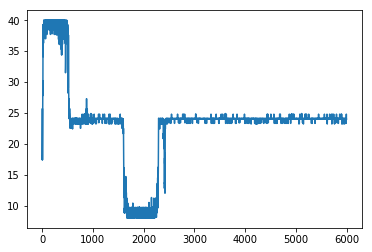

[[4.9775057e-03 9.9493319e-01 8.9311878e-05]
 [8.0599159e-02 9.1870439e-01 6.9637946e-04]
 [9.8236966e-01 1.2828721e-02 4.8016747e-03]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1.0, 0.2, 1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 1.0, 0.2, 0.2, 1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1.0, 0.2, 0.2, 0.2]


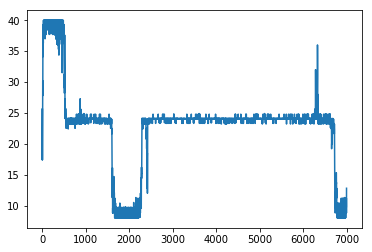

[[1.00377295e-02 9.89587426e-01 3.74741096e-04]
 [9.98552740e-01 7.18404772e-04 7.28868763e-04]
 [9.83066559e-01 1.37350187e-02 3.19848466e-03]]
[0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2]


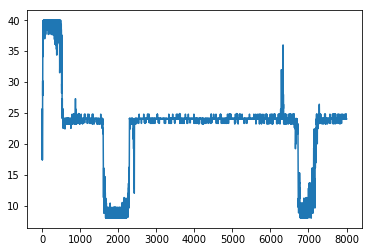

[[4.2267988e-04 9.9948198e-01 9.5327574e-05]
 [9.9926943e-01 5.0970074e-04 2.2080253e-04]
 [9.9383128e-01 4.6404437e-03 1.5282755e-03]]
[0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0]


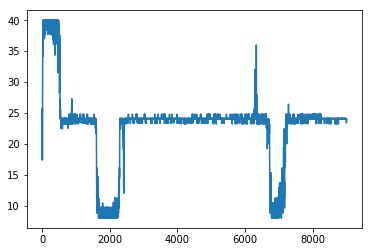

[[9.18449776e-04 9.98978496e-01 1.03165505e-04]
 [9.99482095e-01 4.05668630e-04 1.12272159e-04]
 [9.94271636e-01 4.44713235e-03 1.28126284e-03]]
[1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2]


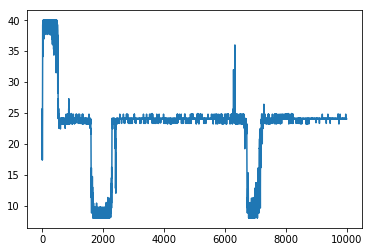

In [1]:
%matplotlib inline
from lxmls.reinforcement_learning.score_function_estimator import train
train()

# 6.4 Policy Gradient for the CartPole task
Implement policy gradient for the cartpole task by coding the forward pass of Model() in lxmls/reinforcement\_learning/policy\_gradient.py. Check it is correct by calling the train() function.

In [ ]:
from lxmls.reinforcement_learning.policy_gradient import train
train()

# Extra: Actor Critic for the CartPole task
Implement actor crtitic for the cartpole task by coding the critic forward pass in lxmls/reinforcement\_learning/policy\_gradient.py. Check it is correct by calling the train() function.

In [ ]:
from lxmls.reinforcement_learning.actor_critic import train
train()